In [5]:
#imports
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [6]:
#OBTER OS DADOS
raw_data = pd.read_csv('Social_Network_Ads.csv',header=0,na_values=['?'])

#REMOVER LINHAS COM VALORES INVÁLIDOS
raw_data=raw_data.dropna()
raw_data.replace(['Male', 'Female'], [0, 1],inplace = True)


#ADICIONA UMA SEGUNDA CAMADA, PARA OS CASOS BENIGNOS
raw_data['N_Purchased']=np.where(raw_data['Purchased']==1, 0, 1)
#print(raw_data.head(10))

#DIVIDIR DADOS ENTRE ENTRADA E SAÍDA
raw_input_data = raw_data.iloc[:,1:4]
raw_output_data = raw_data.iloc[:,4:]

In [7]:
#FUNÇÕES DE VISUALIZAÇÃO
def plot_acc(data):
    plt.plot(data.history['acc'])
    plt.plot(data.history['val_acc'])
    plt.title('Precisão do Modelo')
    plt.ylabel('Precisão')
    plt.xlabel('Época')
    plt.legend(['Treinamento', 'Validação'], loc='upper left')
    plt.show()
    
def plot_loss(data):
    plt.plot(data.history['loss'])
    plt.plot(data.history['val_loss'])
    plt.title('Erro Médio Quadrático')
    plt.ylabel('Custo')
    plt.xlabel('Época')
    plt.legend(['Treinamento', 'Validação'], loc='upper left')
    plt.show()
    
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result    

In [33]:
PCT_EVAL = 0.3
PCT_TEST = 0.4

In [34]:
#DIVIDE E NORMALIZA OS DADOS

x_train, x_validate, y_train, y_validate = train_test_split(raw_input_data,raw_output_data, test_size=PCT_EVAL, shuffle= True)

x_train = normalize(x_train)
x_validate = normalize(x_validate)

#transforma os datasets em arrays
x_train = np.array(x_train.values)
y_train = np.array(y_train.values)

x_validate = np.array(x_validate.values)
y_validate = np.array(y_validate.values)

#normaliza os dados


#x_train = tf.keras.utils.normalize(x_train,axis=1)
#x_validate= tf.keras.utils.normalize(x_validate,axis=1)


In [35]:
model = tf.keras.models.Sequential()

#CAMADA DE ENTRADA (3 ENTRADAS), FUNÇÃO DE ATIVAÇÃO SIGMOID
model.add(tf.keras.layers.Dense(3,kernel_initializer='random_uniform',
                bias_initializer='zeros',activation=tf.nn.sigmoid))

#CAMADA OCULTA #1  (9 NEURONIOS), FUNÇAO DE ATIVAÇÃO SIGMOID
model.add(tf.keras.layers.Dense(2,kernel_initializer='random_uniform',
                bias_initializer='zeros',activation=tf.nn.sigmoid))

#CAMADA DE SAÍDA (1 NEURONIO), FUNÇAO DE ATIVAÇÃO SOFTMAX
model.add(tf.keras.layers.Dense(2,activation=tf.nn.softmax))

In [36]:
model.compile(optimizer='adam',loss='mean_squared_error', metrics = ['accuracy'])

In [37]:
history = model.fit(x_train,y_train, validation_split=PCT_TEST, verbose = 1, epochs=1000)

Train on 168 samples, validate on 112 samples
Epoch 1/1000
168/168 [==============================] - 0s 985us/sample - loss: 0.2384 - acc: 0.6369 - val_loss: 0.2298 - val_acc: 0.7054
Epoch 2/1000
168/168 [==============================] - 0s 94us/sample - loss: 0.2372 - acc: 0.6369 - val_loss: 0.2284 - val_acc: 0.7054
Epoch 3/1000
168/168 [==============================] - 0s 75us/sample - loss: 0.2367 - acc: 0.6369 - val_loss: 0.2270 - val_acc: 0.7054
Epoch 4/1000
168/168 [==============================] - 0s 86us/sample - loss: 0.2359 - acc: 0.6369 - val_loss: 0.2259 - val_acc: 0.7054
Epoch 5/1000
168/168 [==============================] - 0s 85us/sample - loss: 0.2353 - acc: 0.6369 - val_loss: 0.2248 - val_acc: 0.7054
Epoch 6/1000
168/168 [==============================] - 0s 93us/sample - loss: 0.2349 - acc: 0.6369 - val_loss: 0.2237 - val_acc: 0.7054
Epoch 7/1000
168/168 [==============================] - 0s 82us/sample - loss: 0.2344 - acc: 0.6369 - val_loss: 0.2226 - val_acc: 0

168/168 [==============================] - 0s 72us/sample - loss: 0.2308 - acc: 0.6369 - val_loss: 0.2123 - val_acc: 0.7054
Epoch 61/1000
168/168 [==============================] - 0s 77us/sample - loss: 0.2308 - acc: 0.6369 - val_loss: 0.2121 - val_acc: 0.7054
Epoch 62/1000
168/168 [==============================] - 0s 75us/sample - loss: 0.2308 - acc: 0.6369 - val_loss: 0.2118 - val_acc: 0.7054
Epoch 63/1000
168/168 [==============================] - 0s 66us/sample - loss: 0.2308 - acc: 0.6369 - val_loss: 0.2116 - val_acc: 0.7054
Epoch 64/1000
168/168 [==============================] - 0s 82us/sample - loss: 0.2307 - acc: 0.6369 - val_loss: 0.2116 - val_acc: 0.7054
Epoch 65/1000
168/168 [==============================] - 0s 80us/sample - loss: 0.2307 - acc: 0.6369 - val_loss: 0.2115 - val_acc: 0.7054
Epoch 66/1000
168/168 [==============================] - 0s 83us/sample - loss: 0.2307 - acc: 0.6369 - val_loss: 0.2114 - val_acc: 0.7054
Epoch 67/1000
168/168 [=========================

168/168 [==============================] - 0s 61us/sample - loss: 0.2290 - acc: 0.6369 - val_loss: 0.2116 - val_acc: 0.7054
Epoch 120/1000
168/168 [==============================] - 0s 76us/sample - loss: 0.2289 - acc: 0.6369 - val_loss: 0.2116 - val_acc: 0.7054
Epoch 121/1000
168/168 [==============================] - 0s 65us/sample - loss: 0.2289 - acc: 0.6369 - val_loss: 0.2116 - val_acc: 0.7054
Epoch 122/1000
168/168 [==============================] - 0s 67us/sample - loss: 0.2288 - acc: 0.6369 - val_loss: 0.2115 - val_acc: 0.7054
Epoch 123/1000
168/168 [==============================] - 0s 84us/sample - loss: 0.2287 - acc: 0.6369 - val_loss: 0.2115 - val_acc: 0.7054
Epoch 124/1000
168/168 [==============================] - 0s 75us/sample - loss: 0.2287 - acc: 0.6369 - val_loss: 0.2114 - val_acc: 0.7054
Epoch 125/1000
168/168 [==============================] - 0s 98us/sample - loss: 0.2287 - acc: 0.6369 - val_loss: 0.2112 - val_acc: 0.7054
Epoch 126/1000
168/168 [==================

168/168 [==============================] - 0s 75us/sample - loss: 0.2237 - acc: 0.6369 - val_loss: 0.2083 - val_acc: 0.7054
Epoch 179/1000
168/168 [==============================] - 0s 72us/sample - loss: 0.2236 - acc: 0.6369 - val_loss: 0.2083 - val_acc: 0.7054
Epoch 180/1000
168/168 [==============================] - 0s 68us/sample - loss: 0.2235 - acc: 0.6369 - val_loss: 0.2082 - val_acc: 0.7054
Epoch 181/1000
168/168 [==============================] - 0s 77us/sample - loss: 0.2233 - acc: 0.6369 - val_loss: 0.2082 - val_acc: 0.7054
Epoch 182/1000
168/168 [==============================] - 0s 76us/sample - loss: 0.2232 - acc: 0.6369 - val_loss: 0.2082 - val_acc: 0.7054
Epoch 183/1000
168/168 [==============================] - 0s 79us/sample - loss: 0.2231 - acc: 0.6369 - val_loss: 0.2081 - val_acc: 0.7054
Epoch 184/1000
168/168 [==============================] - 0s 80us/sample - loss: 0.2229 - acc: 0.6369 - val_loss: 0.2079 - val_acc: 0.7054
Epoch 185/1000
168/168 [==================

168/168 [==============================] - 0s 77us/sample - loss: 0.2124 - acc: 0.6369 - val_loss: 0.2025 - val_acc: 0.7054
Epoch 238/1000
168/168 [==============================] - 0s 72us/sample - loss: 0.2122 - acc: 0.6369 - val_loss: 0.2025 - val_acc: 0.7054
Epoch 239/1000
168/168 [==============================] - 0s 70us/sample - loss: 0.2119 - acc: 0.6369 - val_loss: 0.2026 - val_acc: 0.7054
Epoch 240/1000
168/168 [==============================] - 0s 90us/sample - loss: 0.2116 - acc: 0.6369 - val_loss: 0.2026 - val_acc: 0.7054
Epoch 241/1000
168/168 [==============================] - 0s 86us/sample - loss: 0.2113 - acc: 0.6369 - val_loss: 0.2026 - val_acc: 0.7054
Epoch 242/1000
168/168 [==============================] - 0s 112us/sample - loss: 0.2111 - acc: 0.6369 - val_loss: 0.2024 - val_acc: 0.7054
Epoch 243/1000
168/168 [==============================] - 0s 75us/sample - loss: 0.2108 - acc: 0.6369 - val_loss: 0.2021 - val_acc: 0.7054
Epoch 244/1000
168/168 [=================

168/168 [==============================] - 0s 69us/sample - loss: 0.1919 - acc: 0.6726 - val_loss: 0.1911 - val_acc: 0.7054
Epoch 297/1000
168/168 [==============================] - 0s 70us/sample - loss: 0.1915 - acc: 0.6726 - val_loss: 0.1907 - val_acc: 0.7054
Epoch 298/1000
168/168 [==============================] - 0s 67us/sample - loss: 0.1911 - acc: 0.6726 - val_loss: 0.1906 - val_acc: 0.7054
Epoch 299/1000
168/168 [==============================] - 0s 81us/sample - loss: 0.1907 - acc: 0.6726 - val_loss: 0.1907 - val_acc: 0.7054
Epoch 300/1000
168/168 [==============================] - 0s 78us/sample - loss: 0.1902 - acc: 0.6726 - val_loss: 0.1905 - val_acc: 0.7054
Epoch 301/1000
168/168 [==============================] - 0s 79us/sample - loss: 0.1898 - acc: 0.6726 - val_loss: 0.1900 - val_acc: 0.7054
Epoch 302/1000
168/168 [==============================] - 0s 87us/sample - loss: 0.1893 - acc: 0.6786 - val_loss: 0.1896 - val_acc: 0.7054
Epoch 303/1000
168/168 [==================

168/168 [==============================] - 0s 57us/sample - loss: 0.1660 - acc: 0.7917 - val_loss: 0.1746 - val_acc: 0.8214
Epoch 356/1000
168/168 [==============================] - 0s 62us/sample - loss: 0.1655 - acc: 0.7917 - val_loss: 0.1743 - val_acc: 0.8125
Epoch 357/1000
168/168 [==============================] - 0s 72us/sample - loss: 0.1651 - acc: 0.7976 - val_loss: 0.1739 - val_acc: 0.8125
Epoch 358/1000
168/168 [==============================] - 0s 58us/sample - loss: 0.1647 - acc: 0.7976 - val_loss: 0.1736 - val_acc: 0.8125
Epoch 359/1000
168/168 [==============================] - 0s 73us/sample - loss: 0.1642 - acc: 0.7976 - val_loss: 0.1733 - val_acc: 0.8125
Epoch 360/1000
168/168 [==============================] - 0s 77us/sample - loss: 0.1638 - acc: 0.7976 - val_loss: 0.1730 - val_acc: 0.8125
Epoch 361/1000
168/168 [==============================] - 0s 84us/sample - loss: 0.1633 - acc: 0.8036 - val_loss: 0.1727 - val_acc: 0.8125
Epoch 362/1000
168/168 [==================

168/168 [==============================] - 0s 73us/sample - loss: 0.1428 - acc: 0.8333 - val_loss: 0.1569 - val_acc: 0.8036
Epoch 415/1000
168/168 [==============================] - 0s 68us/sample - loss: 0.1425 - acc: 0.8452 - val_loss: 0.1568 - val_acc: 0.8036
Epoch 416/1000
168/168 [==============================] - 0s 64us/sample - loss: 0.1422 - acc: 0.8571 - val_loss: 0.1566 - val_acc: 0.8036
Epoch 417/1000
168/168 [==============================] - 0s 91us/sample - loss: 0.1419 - acc: 0.8571 - val_loss: 0.1562 - val_acc: 0.8036
Epoch 418/1000
168/168 [==============================] - 0s 84us/sample - loss: 0.1414 - acc: 0.8571 - val_loss: 0.1560 - val_acc: 0.8036
Epoch 419/1000
168/168 [==============================] - 0s 76us/sample - loss: 0.1411 - acc: 0.8571 - val_loss: 0.1558 - val_acc: 0.8036
Epoch 420/1000
168/168 [==============================] - 0s 80us/sample - loss: 0.1407 - acc: 0.8631 - val_loss: 0.1555 - val_acc: 0.8036
Epoch 421/1000
168/168 [==================

168/168 [==============================] - 0s 77us/sample - loss: 0.1255 - acc: 0.8690 - val_loss: 0.1419 - val_acc: 0.8036
Epoch 474/1000
168/168 [==============================] - 0s 71us/sample - loss: 0.1253 - acc: 0.8690 - val_loss: 0.1416 - val_acc: 0.8036
Epoch 475/1000
168/168 [==============================] - 0s 95us/sample - loss: 0.1250 - acc: 0.8690 - val_loss: 0.1412 - val_acc: 0.8036
Epoch 476/1000
168/168 [==============================] - 0s 65us/sample - loss: 0.1249 - acc: 0.8690 - val_loss: 0.1408 - val_acc: 0.8036
Epoch 477/1000
168/168 [==============================] - 0s 99us/sample - loss: 0.1247 - acc: 0.8690 - val_loss: 0.1405 - val_acc: 0.8036
Epoch 478/1000
168/168 [==============================] - 0s 78us/sample - loss: 0.1244 - acc: 0.8690 - val_loss: 0.1401 - val_acc: 0.8036
Epoch 479/1000
168/168 [==============================] - 0s 91us/sample - loss: 0.1242 - acc: 0.8631 - val_loss: 0.1399 - val_acc: 0.8036
Epoch 480/1000
168/168 [==================

Epoch 532/1000
168/168 [==============================] - 0s 74us/sample - loss: 0.1136 - acc: 0.8571 - val_loss: 0.1297 - val_acc: 0.8125
Epoch 533/1000
168/168 [==============================] - 0s 74us/sample - loss: 0.1134 - acc: 0.8571 - val_loss: 0.1296 - val_acc: 0.8125
Epoch 534/1000
168/168 [==============================] - 0s 67us/sample - loss: 0.1133 - acc: 0.8571 - val_loss: 0.1295 - val_acc: 0.8125
Epoch 535/1000
168/168 [==============================] - 0s 93us/sample - loss: 0.1132 - acc: 0.8571 - val_loss: 0.1294 - val_acc: 0.8125
Epoch 536/1000
168/168 [==============================] - 0s 87us/sample - loss: 0.1129 - acc: 0.8631 - val_loss: 0.1293 - val_acc: 0.8125
Epoch 537/1000
168/168 [==============================] - 0s 86us/sample - loss: 0.1128 - acc: 0.8631 - val_loss: 0.1292 - val_acc: 0.8036
Epoch 538/1000
168/168 [==============================] - 0s 89us/sample - loss: 0.1126 - acc: 0.8631 - val_loss: 0.1290 - val_acc: 0.8036
Epoch 539/1000
168/168 [===

Epoch 591/1000
168/168 [==============================] - 0s 79us/sample - loss: 0.1054 - acc: 0.8690 - val_loss: 0.1221 - val_acc: 0.8125
Epoch 592/1000
168/168 [==============================] - 0s 78us/sample - loss: 0.1053 - acc: 0.8690 - val_loss: 0.1220 - val_acc: 0.8125
Epoch 593/1000
168/168 [==============================] - 0s 64us/sample - loss: 0.1052 - acc: 0.8690 - val_loss: 0.1220 - val_acc: 0.8214
Epoch 594/1000
168/168 [==============================] - 0s 80us/sample - loss: 0.1050 - acc: 0.8750 - val_loss: 0.1219 - val_acc: 0.8214
Epoch 595/1000
168/168 [==============================] - 0s 84us/sample - loss: 0.1049 - acc: 0.8750 - val_loss: 0.1219 - val_acc: 0.8214
Epoch 596/1000
168/168 [==============================] - 0s 78us/sample - loss: 0.1048 - acc: 0.8690 - val_loss: 0.1220 - val_acc: 0.8214
Epoch 597/1000
168/168 [==============================] - 0s 86us/sample - loss: 0.1047 - acc: 0.8750 - val_loss: 0.1221 - val_acc: 0.8304
Epoch 598/1000
168/168 [===

Epoch 650/1000
168/168 [==============================] - 0s 83us/sample - loss: 0.0997 - acc: 0.8631 - val_loss: 0.1157 - val_acc: 0.8304
Epoch 651/1000
168/168 [==============================] - 0s 78us/sample - loss: 0.0996 - acc: 0.8631 - val_loss: 0.1156 - val_acc: 0.8304
Epoch 652/1000
168/168 [==============================] - 0s 67us/sample - loss: 0.0996 - acc: 0.8631 - val_loss: 0.1154 - val_acc: 0.8304
Epoch 653/1000
168/168 [==============================] - 0s 76us/sample - loss: 0.0995 - acc: 0.8631 - val_loss: 0.1153 - val_acc: 0.8304
Epoch 654/1000
168/168 [==============================] - 0s 101us/sample - loss: 0.0995 - acc: 0.8631 - val_loss: 0.1152 - val_acc: 0.8304
Epoch 655/1000
168/168 [==============================] - 0s 81us/sample - loss: 0.0994 - acc: 0.8631 - val_loss: 0.1151 - val_acc: 0.8304
Epoch 656/1000
168/168 [==============================] - 0s 75us/sample - loss: 0.0992 - acc: 0.8631 - val_loss: 0.1151 - val_acc: 0.8304
Epoch 657/1000
168/168 [==

Epoch 709/1000
168/168 [==============================] - 0s 74us/sample - loss: 0.0957 - acc: 0.8810 - val_loss: 0.1115 - val_acc: 0.8482
Epoch 710/1000
168/168 [==============================] - 0s 71us/sample - loss: 0.0956 - acc: 0.8810 - val_loss: 0.1114 - val_acc: 0.8482
Epoch 711/1000
168/168 [==============================] - 0s 91us/sample - loss: 0.0957 - acc: 0.8810 - val_loss: 0.1112 - val_acc: 0.8393
Epoch 712/1000
168/168 [==============================] - 0s 79us/sample - loss: 0.0956 - acc: 0.8810 - val_loss: 0.1112 - val_acc: 0.8393
Epoch 713/1000
168/168 [==============================] - 0s 78us/sample - loss: 0.0955 - acc: 0.8810 - val_loss: 0.1112 - val_acc: 0.8482
Epoch 714/1000
168/168 [==============================] - 0s 82us/sample - loss: 0.0955 - acc: 0.8810 - val_loss: 0.1112 - val_acc: 0.8482
Epoch 715/1000
168/168 [==============================] - ETA: 0s - loss: 0.0629 - acc: 0.937 - 0s 77us/sample - loss: 0.0953 - acc: 0.8810 - val_loss: 0.1111 - val_a

168/168 [==============================] - 0s 78us/sample - loss: 0.0928 - acc: 0.8869 - val_loss: 0.1094 - val_acc: 0.8571
Epoch 768/1000
168/168 [==============================] - 0s 79us/sample - loss: 0.0927 - acc: 0.8869 - val_loss: 0.1092 - val_acc: 0.8482
Epoch 769/1000
168/168 [==============================] - 0s 72us/sample - loss: 0.0927 - acc: 0.8810 - val_loss: 0.1091 - val_acc: 0.8482
Epoch 770/1000
168/168 [==============================] - 0s 69us/sample - loss: 0.0926 - acc: 0.8810 - val_loss: 0.1091 - val_acc: 0.8482
Epoch 771/1000
168/168 [==============================] - 0s 75us/sample - loss: 0.0926 - acc: 0.8810 - val_loss: 0.1089 - val_acc: 0.8482
Epoch 772/1000
168/168 [==============================] - 0s 81us/sample - loss: 0.0925 - acc: 0.8810 - val_loss: 0.1087 - val_acc: 0.8482
Epoch 773/1000
168/168 [==============================] - 0s 79us/sample - loss: 0.0925 - acc: 0.8810 - val_loss: 0.1087 - val_acc: 0.8482
Epoch 774/1000
168/168 [==================

168/168 [==============================] - 0s 79us/sample - loss: 0.0905 - acc: 0.8869 - val_loss: 0.1068 - val_acc: 0.8571
Epoch 827/1000
168/168 [==============================] - 0s 90us/sample - loss: 0.0904 - acc: 0.8869 - val_loss: 0.1067 - val_acc: 0.8571
Epoch 828/1000
168/168 [==============================] - 0s 82us/sample - loss: 0.0904 - acc: 0.8869 - val_loss: 0.1066 - val_acc: 0.8571
Epoch 829/1000
168/168 [==============================] - 0s 69us/sample - loss: 0.0904 - acc: 0.8810 - val_loss: 0.1066 - val_acc: 0.8571
Epoch 830/1000
168/168 [==============================] - 0s 84us/sample - loss: 0.0904 - acc: 0.8810 - val_loss: 0.1066 - val_acc: 0.8571
Epoch 831/1000
168/168 [==============================] - 0s 77us/sample - loss: 0.0903 - acc: 0.8810 - val_loss: 0.1066 - val_acc: 0.8571
Epoch 832/1000
168/168 [==============================] - 0s 76us/sample - loss: 0.0903 - acc: 0.8869 - val_loss: 0.1067 - val_acc: 0.8571
Epoch 833/1000
168/168 [==================

168/168 [==============================] - 0s 74us/sample - loss: 0.0888 - acc: 0.8869 - val_loss: 0.1059 - val_acc: 0.8571
Epoch 886/1000
168/168 [==============================] - 0s 68us/sample - loss: 0.0888 - acc: 0.8869 - val_loss: 0.1058 - val_acc: 0.8571
Epoch 887/1000
168/168 [==============================] - 0s 63us/sample - loss: 0.0888 - acc: 0.8869 - val_loss: 0.1057 - val_acc: 0.8571
Epoch 888/1000
168/168 [==============================] - 0s 80us/sample - loss: 0.0887 - acc: 0.8869 - val_loss: 0.1058 - val_acc: 0.8571
Epoch 889/1000
168/168 [==============================] - 0s 72us/sample - loss: 0.0887 - acc: 0.8869 - val_loss: 0.1059 - val_acc: 0.8571
Epoch 890/1000
168/168 [==============================] - 0s 77us/sample - loss: 0.0887 - acc: 0.8869 - val_loss: 0.1058 - val_acc: 0.8571
Epoch 891/1000
168/168 [==============================] - 0s 66us/sample - loss: 0.0887 - acc: 0.8869 - val_loss: 0.1056 - val_acc: 0.8571
Epoch 892/1000
168/168 [==================

168/168 [==============================] - 0s 63us/sample - loss: 0.0875 - acc: 0.8929 - val_loss: 0.1042 - val_acc: 0.8571
Epoch 945/1000
168/168 [==============================] - 0s 63us/sample - loss: 0.0875 - acc: 0.8929 - val_loss: 0.1042 - val_acc: 0.8571
Epoch 946/1000
168/168 [==============================] - 0s 77us/sample - loss: 0.0874 - acc: 0.8869 - val_loss: 0.1043 - val_acc: 0.8571
Epoch 947/1000
168/168 [==============================] - 0s 85us/sample - loss: 0.0874 - acc: 0.8869 - val_loss: 0.1044 - val_acc: 0.8571
Epoch 948/1000
168/168 [==============================] - 0s 87us/sample - loss: 0.0873 - acc: 0.8869 - val_loss: 0.1044 - val_acc: 0.8571
Epoch 949/1000
168/168 [==============================] - 0s 77us/sample - loss: 0.0873 - acc: 0.8869 - val_loss: 0.1044 - val_acc: 0.8571
Epoch 950/1000
168/168 [==============================] - 0s 68us/sample - loss: 0.0873 - acc: 0.8869 - val_loss: 0.1043 - val_acc: 0.8571
Epoch 951/1000
168/168 [==================

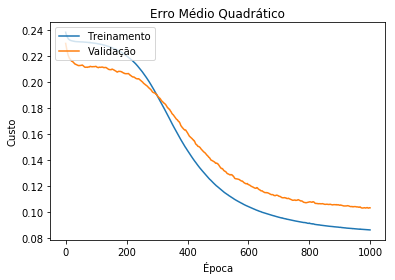

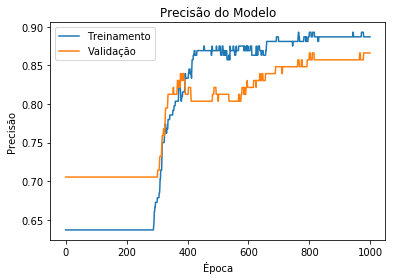

In [38]:
plot_loss(history)
plot_acc(history)

In [45]:
custo_val, acc_val = model.evaluate(x_validate, y_validate)
predictions = model.predict([x_validate])

y_true = np.zeros(len(y_validate))
predictions_true = np.zeros(len(predictions))
for i in range(len(y_validate)):
    y_true[i] = np.argmax(y_validate[i]) 
    predictions_true[i] = np.argmax(predictions[i])
    
p = 10
print("VALORES ESTIMADOS")
print(predictions_true[0:p])
print()
print("VALORES REAIS")
print(y_true[0:p])
#1 = Nao comprou
#0 = Comprou

120/120 [==============================] - 0s 34us/sample - loss: 0.1463 - acc: 0.7833
VALORES ESTIMADOS
[1. 1. 0. 0. 1. 1. 1. 1. 0. 1.]

VALORES REAIS
[0. 1. 0. 0. 1. 1. 1. 1. 0. 1.]


In [49]:
print(confusion_matrix(y_true[0:p], predictions_true[0:p]))
#VP, FN // FP, VN

[[3 1]
 [0 6]]


In [ ]:
weights = model.layers[0].get_weights()[0]
biases = model.layers[0].get_weights()[1]
#print(weights)
#print(biases)